In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# Prepare features and target
X = df.drop(columns=["Id", "Species"])
y = LabelEncoder().fit_transform(df["Species"])

In [8]:
# Standardize features for models sensitive to scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Store results
results = []

In [13]:
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    results.append({"Model": name, "Mean Accuracy": scores.mean()})

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="Mean Accuracy", ascending=False)
print("Model Accuracy Comparison:")
print(results_df)


Model Accuracy Comparison:
                  Model  Mean Accuracy
0   Logistic Regression       0.958333
6   Logistic Regression       0.958333
18  Logistic Regression       0.958333
12  Logistic Regression       0.958333
10                  SVM       0.950000
16                  SVM       0.950000
4                   SVM       0.950000
3         Random Forest       0.950000
22                  SVM       0.950000
15        Random Forest       0.941667
21        Random Forest       0.941667
9         Random Forest       0.941667
7   K-Nearest Neighbors       0.933333
5     Gradient Boosting       0.933333
1   K-Nearest Neighbors       0.933333
2         Decision Tree       0.933333
14        Decision Tree       0.933333
13  K-Nearest Neighbors       0.933333
8         Decision Tree       0.933333
11    Gradient Boosting       0.933333
19  K-Nearest Neighbors       0.933333
17    Gradient Boosting       0.933333
20        Decision Tree       0.933333
23    Gradient Boosting       0.93333

C:\Users\anup\AppData\Local\Temp\ipykernel_8916\2540936753.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Mean Accuracy", y="Model", data=results_df, palette="Blues_r")


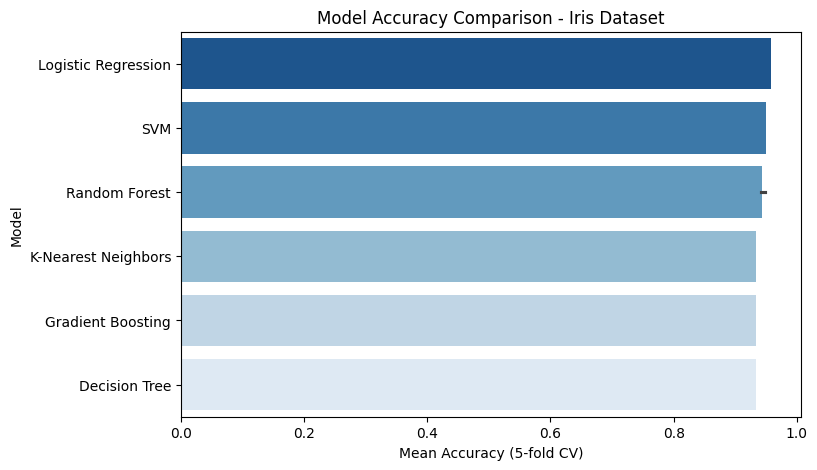

In [14]:
# Plot results
plt.figure(figsize=(8, 5))
sns.barplot(x="Mean Accuracy", y="Model", data=results_df, palette="Blues_r")
plt.xlabel("Mean Accuracy (5-fold CV)")
plt.title("Model Accuracy Comparison - Iris Dataset")
plt.show()

In [17]:
# Train best model
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [18]:
# Classification report
print(f"\nBest Model: {best_model_name}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Model: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



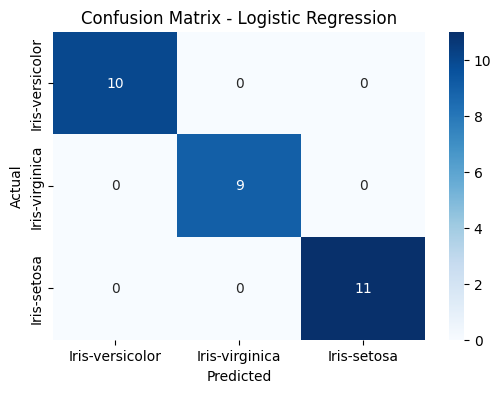

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(df["Species"]), yticklabels=set(df["Species"]))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()
# Save the best model



In [20]:
import joblib
joblib.dump(best_model, "best_iris_model.pkl")
print(f"\nBest model saved as 'best_iris_model.pkl'")


Best model saved as 'best_iris_model.pkl'
